## 금융 데이터 분석
## 포트폴리오 이론
포트폴리오 이론은 "계란을 한 바구니에 모두 담지 말라"는 유명한 투자 격언을 수학적으로 증명하고 체계화한 이론입니다. 1952년 해리 마코위츠(Harry Markowitz)에 의해 발표되었으며, 이 공로로 그는 1990년 노벨 경제학상을 수상했습니다.

이 이론의 핵심은 ```분산 투자(Diversification)```를 통해 개별 자산이 가진 고유의 위험을 줄이고, 동일한 위험 수준에서는 최고의 기대수익률을, 동일한 기대수익률 하에서는 최소의 위험을 갖는 최적의 포트폴리오를 구성하는 것입니다.

In [1]:
import FinanceDataReader as fdr

stocks = ['TSLA', 'AAPL', "NVDA"]

df = fdr.DataReader(stocks)
df = df.dropna()
df

,TSLA,AAPL,NVDA
2010-06-29,1.592667,7.698982,0.240238
2010-06-30,1.588667,7.559529,0.234048
2010-07-01,1.464000,7.467865,0.237945
2010-07-02,1.280000,7.421580,0.234965
2010-07-06,1.074000,7.472372,0.232444
...,...,...,...
2025-06-13,325.309998,196.449997,141.970001
2025-06-16,329.130005,198.419998,144.690002
2025-06-17,316.350006,195.639999,144.119995
2025-06-18,322.049988,196.580002,145.479996


In [2]:
daily_ret = df.pct_change() # 일간수익률
daily_ret

,TSLA,AAPL,NVDA
2010-06-29,NaN,NaN,NaN
2010-06-30,-0.002511,-0.018113,-0.025763
2010-07-01,-0.078473,-0.012126,0.016650
2010-07-02,-0.125683,-0.006198,-0.012524
2010-07-06,-0.160937,0.006844,-0.010731
...,...,...,...
2025-06-13,0.019429,-0.013805,-0.020897
2025-06-16,0.011743,0.010028,0.019159
2025-06-17,-0.038830,-0.014011,-0.003940
2025-06-18,0.018018,0.004805,0.009437


In [3]:
annual_ret = daily_ret.mean() * 252 # 연간 평균 수익률
annual_ret

TSLA    0.523152
AAPL    0.258255
NVDA    0.533367
dtype: float64

### 공분산
공분산은 두 개의 확률 변수가 함께 어떻게 변하는지를 측정하는 지표입니다. 즉, 하나의 변수가 증가할 때 다른 변수도 함께 증가하는지, 아니면 반대로 감소하는지, 혹은 아무런 관계가 없는지를 나타냅니다.

    * 양(+)의 공분산: 두 변수가 같은 방향으로 움직이는 경향이 있습니다. (하나가 증가하면 다른 하나도 증가)
    * 음(-)의 공분산: 두 변수가 반대 방향으로 움직이는 경향이 있습니다. (하나가 증가하면 다른 하나는 감소)
    * 0에 가까운 공분산: 두 변수 사이에 선형적인 관계가 거의 없습니다.

In [4]:
# 공부 시간 (시간)
study_hours = [2, 3, 5, 6, 8]

# 시험 점수 (100점 만점)
exam_scores = [65, 70, 75, 80, 90]

In [6]:
# 1단계: 각 변수의 평균 계산
mean_hours = sum(study_hours) / len(study_hours)
mean_scores = sum(exam_scores) / len(exam_scores)
print(f"공부 시간 평균: {mean_hours}")
print(f"시험 점수 평균: {mean_scores}")

공부 시간 평균: 4.8
시험 점수 평균: 76.0


In [8]:
# 2단계: 각 변수의 편차 계산
dev_hours = [h - mean_hours for h in study_hours]
dev_scores = [s - mean_scores for s in exam_scores]
print(f"공부 시간 편차: {dev_hours}")
print(f"시험 점수 편차: {dev_scores}")

공부 시간 편차: [-2.8, -1.7999999999999998, 0.20000000000000018, 1.2000000000000002, 3.2]
시험 점수 편차: [-11.0, -6.0, -1.0, 4.0, 14.0]


In [9]:
# 3단계: 편차의 곱을 계산하고 모두 더하기
sum_of_products = sum([dh * ds for dh, ds in zip(dev_hours, dev_scores)])
print(f"편차 곱의 합: {sum_of_products}")

편차 곱의 합: 91.0


In [10]:
# 4단계: n-1로 나누어 공분산 계산 (n은 데이터 개수)
n = len(study_hours)
covariance_manual = sum_of_products / (n - 1)

print(f"✅ 직접 계산한 공분산: {covariance_manual}")

# 이는 공부 시간이 늘어날수록 시험 점수도 증가하는 경향이 있다는 것을 의미합니다.

✅ 직접 계산한 공분산: 22.75


In [14]:
import numpy as np

data_array = np.array([study_hours, exam_scores])

# np.cov() 함수로 공분산 행렬 계산
# rowvar=True가 기본값이며, 각 행을 하나의 변수로 인식합니다.
covariance_matrix_np = np.cov(data_array)

print("공분산 행렬:")
print(covariance_matrix_np)

# 공분산 값 추출
covariance_np = covariance_matrix_np[0, 1] # 또는 [1, 0]
print(f"\n✅ NumPy로 계산한 공분산: {covariance_np}")

공분산 행렬:
[[ 5.7  22.75]
 [22.75 92.5 ]]

✅ NumPy로 계산한 공분산: 22.749999999999996


In [15]:
# 1. 공분산 값 추출
cov_xy = covariance_matrix_np[0, 1]

# 2. 각 변수의 분산(Variance) 추출 (공분산 행렬의 대각선 값)
var_hours = covariance_matrix_np[0, 0]
var_scores = covariance_matrix_np[1, 1]

# 3. 분산에 제곱근을 취해 표준편차(Standard Deviation) 계산
std_dev_hours = np.sqrt(var_hours)
std_dev_scores = np.sqrt(var_scores)

# 4. 상관계수 공식에 대입
correlation_manual = cov_xy / (std_dev_hours * std_dev_scores)
correlation_manual

0.9907705906037535

In [16]:
daily_cov = daily_ret.cov() # 공분산 / 일간 리스크
daily_cov

,TSLA,AAPL,NVDA
TSLA,0.001340,0.000242,0.000397
AAPL,0.000242,0.000317,0.000251
NVDA,0.000397,0.000251,0.000843


In [17]:
annual_cov = daily_cov * 252 # 연간 리스크
annual_cov

,TSLA,AAPL,NVDA
TSLA,0.337696,0.060986,0.099982
AAPL,0.060986,0.079900,0.063153
NVDA,0.099982,0.063153,0.212479


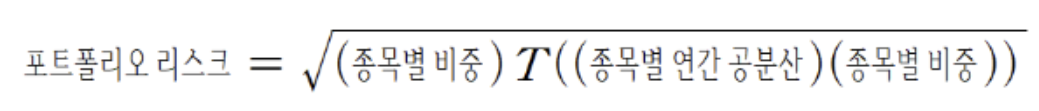

In [19]:
import pandas as pd

total = []

for n in range(10000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharp_ratio = returns / risk
    
    total.append([returns, risk] + list(weights))

df = pd.DataFrame(total, columns = ['Returns', "Risk"] + stocks)
df

,Returns,Risk,TSLA,AAPL,NVDA
0,0.435257,0.336121,0.222716,0.348348,0.428936
1,0.434965,0.336012,0.227393,0.349238,0.423369
2,0.422190,0.327799,0.140182,0.398909,0.460909
3,0.387882,0.306706,0.099119,0.525140,0.375741
4,0.487924,0.480989,0.767009,0.136700,0.096291
...,...,...,...,...,...
9995,0.402848,0.314578,0.204780,0.466819,0.328401
9996,0.388877,0.316323,0.291525,0.514381,0.194094
9997,0.462153,0.361851,0.332390,0.246514,0.421096
9998,0.432532,0.350843,0.384928,0.352230,0.262842


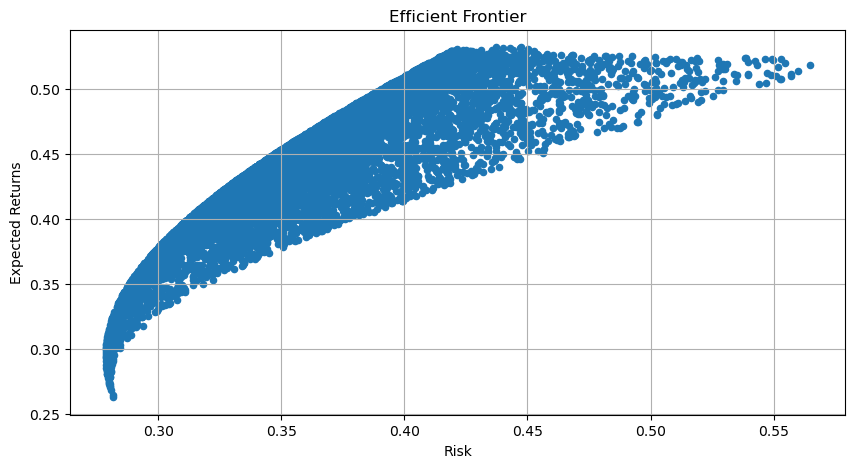

In [20]:
import matplotlib.pyplot as plt

df.plot.scatter(x = 'Risk', y = "Returns", figsize = (10, 5), grid = True)

plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Expected Returns")
plt.show()

In [21]:
total = []

for n in range(10000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe_ratio = returns / risk
    
    total.append([returns, risk, sharpe_ratio] + list(weights))

df = pd.DataFrame(total, columns = ['Returns', "Risk", "Sharpe"] + stocks)
df

,Returns,Risk,Sharpe,TSLA,AAPL,NVDA
0,0.430155,0.335833,1.280862,0.282654,0.364668,0.352679
1,0.421207,0.328395,1.282622,0.118591,0.403285,0.478125
2,0.459712,0.360519,1.275141,0.336578,0.255228,0.408194
3,0.445001,0.397908,1.118351,0.558436,0.300467,0.141097
4,0.488565,0.383975,1.272386,0.354205,0.149698,0.496097
...,...,...,...,...,...,...
9995,0.433924,0.345905,1.254459,0.054875,0.359427,0.585698
9996,0.439503,0.350585,1.253628,0.360546,0.327799,0.311655
9997,0.446289,0.364462,1.224516,0.420126,0.300920,0.278954
9998,0.433575,0.405224,1.069963,0.592593,0.340729,0.066677


In [22]:
max_sharpe = df[df['Sharpe'] == df['Sharpe'].max()]
max_sharpe

,Returns,Risk,Sharpe,TSLA,AAPL,NVDA
2140,0.443123,0.341915,1.296005,0.214485,0.320061,0.465454


In [23]:
min_risk = df[df['Risk'] == df['Risk'].min()]
min_risk

,Returns,Risk,Sharpe,TSLA,AAPL,NVDA
9095,0.296584,0.27854,1.064782,0.048438,0.85888,0.092682


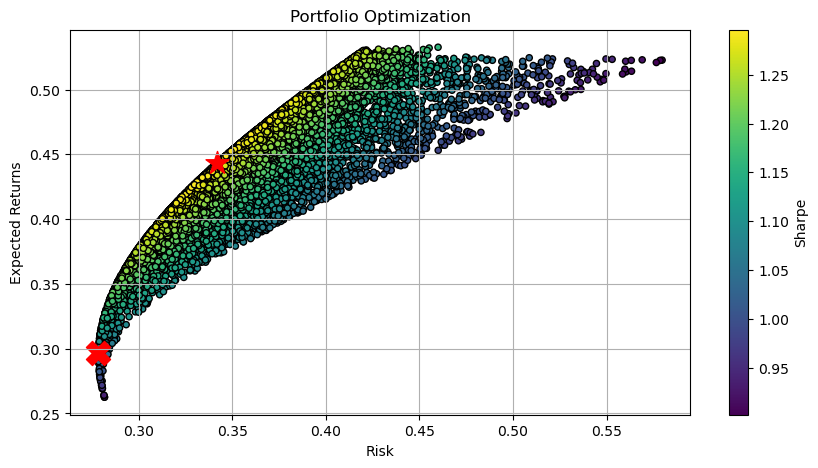

In [24]:
df.plot.scatter(x = 'Risk', y = "Returns", c = "Sharpe", cmap = "viridis", edgecolor = "k", figsize = (10, 5), grid = True)

plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'], c = 'r', marker = '*', s = 300)
plt.scatter(x = min_risk['Risk'], y = min_risk['Returns'], c = 'r', marker = 'X', s = 300)

plt.title("Portfolio Optimization")
plt.xlabel("Risk")
plt.ylabel("Expected Returns")
plt.show()

## 연습문제
### 1. 강의 자료에서 사용한 5개 종목(삼성전자, SK하이닉스 등) 대신, **금융주 3개(KB금융, 신한지주, 하나금융지주)와 기술주 2개(카카오, 크래프톤)**를 선택하여 새로운 포트폴리오를 구성하세요.

    * 종목 코드: 105560(KB금융), 055550(신한지주), 086790(하나금융지주), 035720(카카오), 259960(크래프톤)
    * 최근 5년 치 데이터를 사용하여 강의 자료와 동일한 프로세스로 포트폴리오 최적화를 수행하고, 효율적 투자선(Efficient Frontier)을 시각화하세요.

In [1]:
import FinanceDataReader as fdr

stocks = ["105560", "055550", "086790", "035720", "259960"]

df = fdr.DataReader(stocks).dropna()
df

,105560,055550,086790,035720,259960
Date,,,,,
2021-08-10,52300,38900,44250,146500,454000.0
2021-08-11,53600,39200,45000,144000,407000.0
2021-08-12,53400,39350,45300,147500,406000.0
2021-08-13,53200,38900,44650,146000,437000.0
2021-08-17,53200,38850,44500,142000,451500.0
...,...,...,...,...,...
2025-06-27,110600,60500,84200,60900,357500.0
2025-06-30,110900,61400,86300,60000,363000.0
2025-07-01,110800,62200,88900,60100,362000.0


In [2]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

In [5]:
# 시뮬레이션
import pandas as pd
import numpy as np

total = []

for n in range(10000):
    weights = np.random.random(len(stocks))
    weights = weights / np.sum(weights)

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe_ratio = (returns - 0.03) / risk 
    
    total.append([returns, risk, sharpe_ratio] + list(weights))

df = pd.DataFrame(total, columns = ['Returns', 'Risk', "Sharpe", "KB금융", "신한지주", "하나금융지주", "카카오", "크래프톤"])
df

# 각 비중대로 샀을때 수익률은 이렇고 위험률은 이렇다

,Returns,Risk,Sharpe,KB금융,신한지주,하나금융지주,카카오,크래프톤
0,0.096808,0.249722,0.267527,0.071199,0.299257,0.237943,0.230018,0.161583
1,0.057423,0.264150,0.103816,0.100475,0.166057,0.148368,0.291436,0.293664
2,0.063449,0.323960,0.103251,0.140017,0.024113,0.078255,0.148951,0.608665
3,0.081869,0.290947,0.178275,0.147827,0.025108,0.182377,0.163095,0.481593
4,0.106333,0.262101,0.291235,0.290299,0.098052,0.241910,0.299184,0.070556
...,...,...,...,...,...,...,...,...
9995,0.164283,0.266393,0.504077,0.396604,0.018808,0.285846,0.116140,0.182603
9996,0.062540,0.338866,0.096026,0.063775,0.058011,0.097566,0.109197,0.671451
9997,0.151937,0.260551,0.467995,0.402140,0.158228,0.139147,0.135676,0.164809
9998,0.108813,0.273659,0.287998,0.106215,0.384834,0.020832,0.059778,0.428340


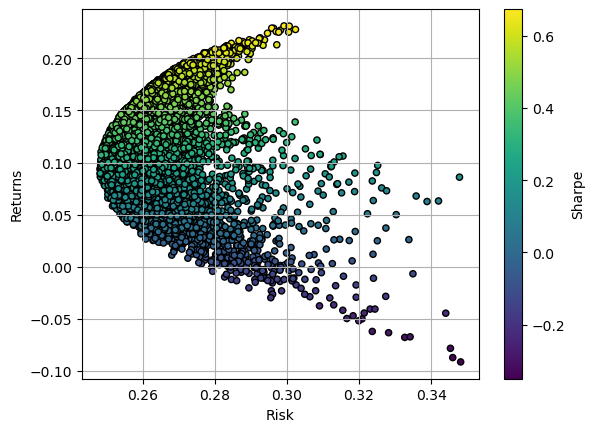

In [9]:
import matplotlib.pyplot as plt

df.plot.scatter(x = "Risk", y = "Returns", grid = True,
                cmap = "viridis", c = "Sharpe", edgecolor = "k")

plt.show()

### 2. 문제 1에서 찾은 ```'최대 샤프지수 포트폴리오'```와 ```'최소 위험 포트폴리오'```에 대해, 각 종목이 몇 퍼센트의 비중을 차지하는지 파이 차트(Pie Chart)로 시각화하고 그 결과를 설명하세요.

Returns    0.229101
Risk       0.295817
Sharpe     0.673054
KB금융       0.506914
신한지주       0.085274
하나금융지주     0.341489
카카오        0.006614
크래프톤       0.059708
Name: 3809, dtype: float64


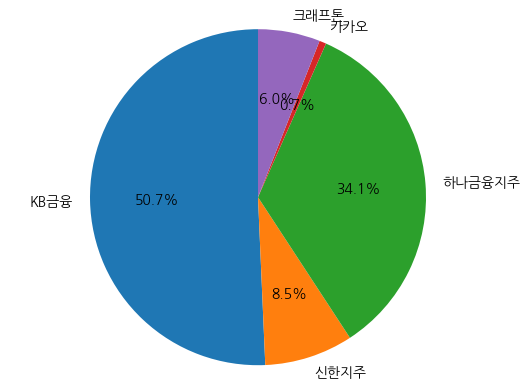

In [21]:
# 최대 샤프지수
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib

max_sharpe = df[df["Sharpe"] == df["Sharpe"].max()].iloc[0]
print(max_sharpe)

excluded_cols = ['Returns', 'Risk', 'Sharpe']
asset_weights = max_sharpe.drop(labels=excluded_cols)

asset_weights = asset_weights[asset_weights > 0]

plt.pie(asset_weights, labels=asset_weights.index, 
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

Returns    0.093562
Risk       0.248185
Sharpe     0.256108
KB금융       0.060623
신한지주       0.479151
하나금융지주     0.069507
카카오        0.191569
크래프톤       0.199151
Name: 6204, dtype: float64


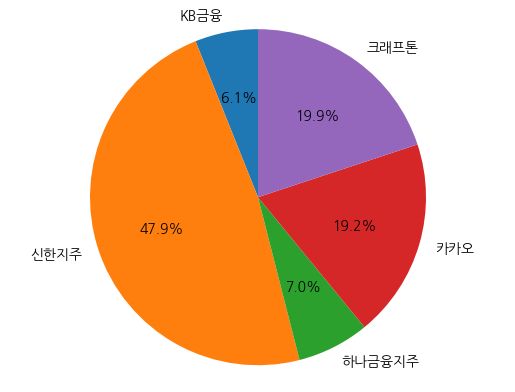

In [23]:
# 최소 위험
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib

min_risk = df[df["Risk"] == df["Risk"].min()].iloc[0]
print(min_risk)

excluded_cols = ['Returns', 'Risk', 'Sharpe']
asset_weights = min_risk.drop(labels=excluded_cols)

asset_weights = asset_weights[asset_weights > 0]

plt.pie(asset_weights, labels=asset_weights.index, 
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

### 3. 강의 자료에서는 20,000개의 무작위 포트폴리오를 생성했습니다. 시뮬레이션 횟수를 500개로 대폭 줄여서 최적화를 실행하고 효율적 투자선을 시각화해보세요. 20,000번 실행했을 때의 그래프와 어떤 차이가 있는지, 그리고 시뮬레이션 횟수가 왜 중요한지 생각해보세요.

In [26]:
import FinanceDataReader as fdr

stocks = ["TSLA", "AAPL", "NVDA"]

df = fdr.DataReader(stocks).dropna()
df

,TSLA,AAPL,NVDA
2010-06-29,1.592667,7.698978,0.240238
2010-06-30,1.588667,7.559531,0.234048
2010-07-01,1.464000,7.467864,0.237945
2010-07-02,1.280000,7.421581,0.234965
2010-07-06,1.074000,7.472373,0.232444
...,...,...,...
2025-06-26,325.779999,201.000000,155.020004
2025-06-27,323.630005,201.080002,157.750000
2025-06-30,317.660004,205.169998,157.990005
2025-07-01,300.709991,207.820007,153.300003


In [27]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

In [28]:
import pandas as pd

total = []

for n in range(500):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe_ratio = (returns - 0.03) / risk 
    
    total.append([returns, risk, sharpe_ratio] + list(weights))

df = pd.DataFrame(total, columns = ['Returns', "Risk", "Sharpe"] + stocks)
df

,Returns,Risk,Sharpe,TSLA,AAPL,NVDA
0,0.418704,0.322924,1.203700,0.221290,0.418308,0.360402
1,0.430252,0.402962,0.993275,0.588293,0.353839,0.057868
2,0.485169,0.386049,1.179046,0.410797,0.166511,0.422692
3,0.433240,0.394669,1.021716,0.560354,0.344783,0.094864
4,0.355334,0.295924,1.099385,0.220641,0.647215,0.132143
...,...,...,...,...,...,...
495,0.327346,0.286993,1.036075,0.178942,0.750881,0.070178
496,0.384774,0.304813,1.163907,0.215813,0.541189,0.242998
497,0.460211,0.381420,1.127920,0.470786,0.252930,0.276284
498,0.389011,0.315777,1.136911,0.293272,0.521083,0.185644


Returns    0.466566
Risk       0.358306
Sharpe     1.218417
TSLA       0.223752
AAPL       0.245297
NVDA       0.530951
Name: 318, dtype: float64


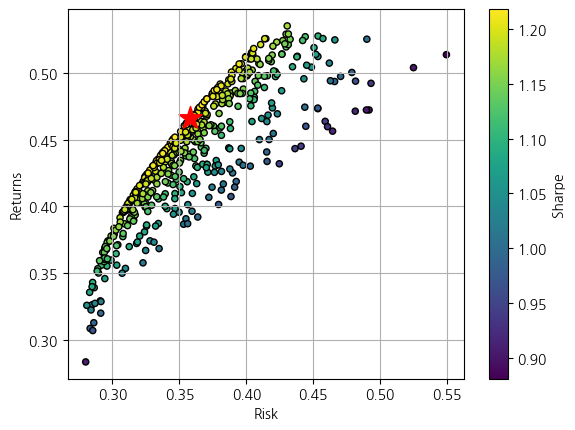

In [33]:
import matplotlib.pyplot as plt

max_sharpe = df[df["Sharpe"] == df["Sharpe"].max()].iloc[0]
print(max_sharpe)

df.plot.scatter(x = "Risk", y = "Returns", grid = True,
                cmap = "viridis", c = "Sharpe", edgecolor = "k")

plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'],
            c = 'r', marker = '*', s = 300)

plt.show()

시뮬레이션 횟수가 적어 그래프의 정확한 분포을 확인하기 어렵고, 최적화된 지점이 정확하다고 할 수 없다

### 4. 분석 기간을 최근 1년으로 변경하여 포트폴리오 최적화를 다시 수행하세요. 전체 기간으로 분석했을 때의 '최대 샤프지수 포트폴리오'와 최근 1년 기준 '최대 샤프지수 포트폴리오'의 자산 배분 비중이 어떻게 달라졌는지 비교하고, 그 이유를 추측해보세요. 전체 기간과 최근 1년 두 가지를 모두 분석했을 때, 전체 기간을 따르는게 좋을까요? 최근 1년을 따르는게 좋을까요?

Returns    0.460031
Risk       0.352869
Sharpe     1.218670
TSLA       0.222716
AAPL       0.268965
NVDA       0.508319
Name: 1784, dtype: float64


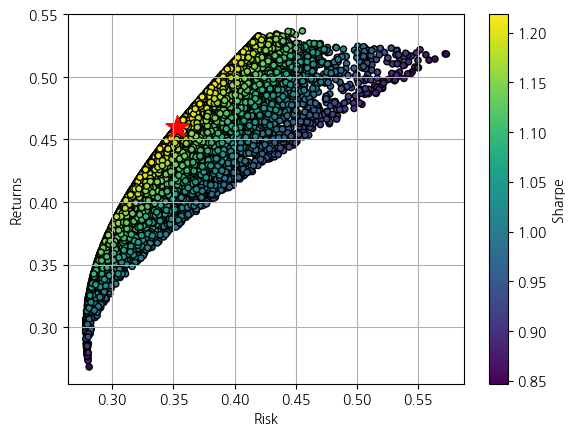

In [41]:
# 전체기간으로 분석했을 때의 최대 샤프지수 포트폴리오

import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

stocks = ["TSLA", "AAPL", "NVDA"]

df = fdr.DataReader(stocks).dropna()

daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

total = []

for n in range(10000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe_ratio = (returns - 0.03) / risk 
    
    total.append([returns, risk, sharpe_ratio] + list(weights))

df = pd.DataFrame(total, columns = ['Returns', "Risk", "Sharpe"] + stocks)

max_sharpe = df[df["Sharpe"] == df["Sharpe"].max()].iloc[0]
print(max_sharpe)

df.plot.scatter(x = "Risk", y = "Returns", grid = True,
                cmap = "viridis", c = "Sharpe", edgecolor = "k")

plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'],
            c = 'r', marker = '*', s = 300)

plt.show()

In [43]:
# 최근 1년 기준 최대 샤프지수 포트폴리오
import FinanceDataReader as fdr

stocks = ["TSLA", "AAPL", "NVDA"]

df = fdr.DataReader(stocks).dropna()
df = df.tail(252)
df

,TSLA,AAPL,NVDA
2024-07-01,209.860001,215.741043,124.260757
2024-07-02,231.259995,219.244659,122.631264
2024-07-03,246.389999,220.518707,128.239487
2024-07-05,251.520004,225.286392,125.790260
2024-07-08,252.940002,226.759521,128.159500
...,...,...,...
2025-06-26,325.779999,201.000000,155.020004
2025-06-27,323.630005,201.080002,157.750000
2025-06-30,317.660004,205.169998,157.990005
2025-07-01,300.709991,207.820007,153.300003


Returns    0.591994
Risk       0.619859
Sharpe     0.906648
TSLA       0.677835
AAPL       0.001929
NVDA       0.320236
Name: 2274, dtype: float64


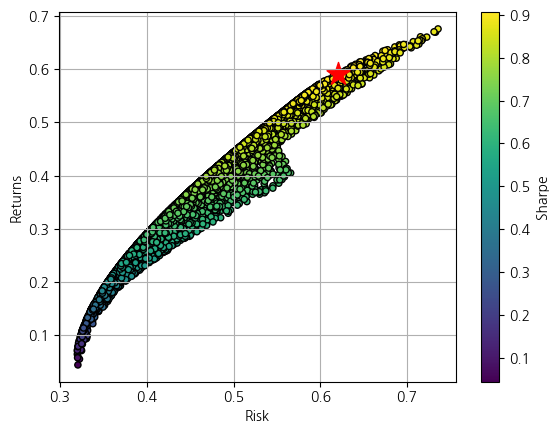

In [44]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

total = []

for n in range(10000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe_ratio = (returns - 0.03) / risk 
    
    total.append([returns, risk, sharpe_ratio] + list(weights))

df = pd.DataFrame(total, columns = ['Returns', "Risk", "Sharpe"] + stocks)

max_sharpe = df[df["Sharpe"] == df["Sharpe"].max()].iloc[0]
print(max_sharpe)

df.plot.scatter(x = "Risk", y = "Returns", grid = True,
                cmap = "viridis", c = "Sharpe", edgecolor = "k")

plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'],
            c = 'r', marker = '*', s = 300)

plt.show()

최근 1년의 수익률이 더 높지만, Sharpe(위험 대비 수익)는 더 낮다.

투자 안정성, 분산, 위험 대비 효율 등을 고려할 때 전체 기간 기준이 더 바람직하다.

### 5. 강의 자료에서는 계산 편의상 무위험수익률을 0으로 가정했습니다. 우리나라의 기준금리를 ```무위험수익률로 가정하여 3.5%(0.035)```로 설정하고, 샤프지수 계산식을 수정한 뒤 포트폴리오 최적화를 다시 수행하세요.

Returns    0.463888
Risk       0.356058
Sharpe     1.204545
TSLA       0.228918
AAPL       0.254648
NVDA       0.516434
Name: 4259, dtype: float64


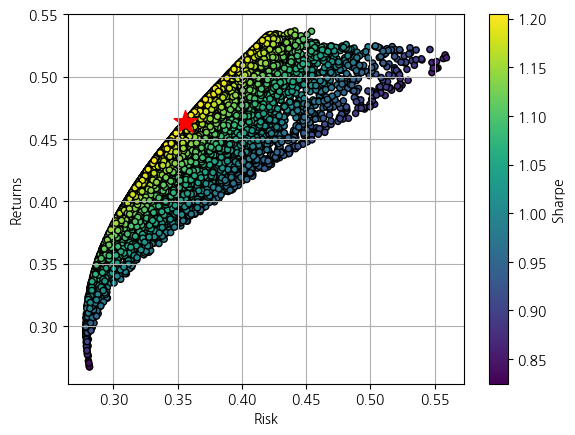

In [45]:
import FinanceDataReader as fdr

stocks = ["TSLA", "AAPL", "NVDA"]

df = fdr.DataReader(stocks).dropna()

daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

total = []

for n in range(10000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe_ratio = (returns - 0.035) / risk 
    
    total.append([returns, risk, sharpe_ratio] + list(weights))

df = pd.DataFrame(total, columns = ['Returns', "Risk", "Sharpe"] + stocks)

max_sharpe = df[df["Sharpe"] == df["Sharpe"].max()].iloc[0]
print(max_sharpe)

df.plot.scatter(x = "Risk", y = "Returns", grid = True,
                cmap = "viridis", c = "Sharpe", edgecolor = "k")

plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'],
            c = 'r', marker = '*', s = 300)

plt.show()